In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

%matplotlib inline

In [2]:
df_profile = pd.read_csv("C:/Users/Meli/Desktop/Ironhack/Lab1/week5_project/data/df_final_demo.txt")
df_profile

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


# Data wrangling

In [3]:
df_profile.dtypes

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

In [4]:
df_profile.columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

In [5]:
df_profile["clnt_tenure_yr"].fillna(0).astype(float)
df_profile["clnt_tenure_mnth"].fillna(0).astype(float)
df_profile["clnt_age"].fillna(0).astype(float)
df_profile["num_accts"].fillna(0).astype(float)
df_profile["bal"].fillna(0).astype(float)
df_profile["calls_6_mnth"].fillna(0).astype(float)
df_profile["logons_6_mnth"].fillna(0).astype(float)
df_profile["client_id"].fillna(0).astype(int)
df_profile["gendr"].fillna("Unknown").astype(str)

0        U
1        U
2        U
3        M
4        F
        ..
70604    U
70605    M
70606    F
70607    M
70608    F
Name: gendr, Length: 70609, dtype: object

In [6]:
# Drop rows where 'gendr' column is 'U' or 'X'
df_profile = df_profile[~df_profile['gendr'].isin(['U', 'X'])]

display(df_profile)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
7,388801,30.0,361.0,57.5,M,5.0,522498.72,1.0,4.0
8,285619,30.0,369.0,67.5,M,2.0,299388.72,3.0,6.0
9,8198645,15.0,189.0,54.5,F,2.0,382303.83,6.0,9.0
...,...,...,...,...,...,...,...,...,...
70602,7979279,4.0,49.0,35.0,F,2.0,40441.45,3.0,3.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [7]:
df_profile["gendr"].value_counts()

gendr
M    23724
F    22746
Name: count, dtype: int64

In [8]:
df_profile.isnull().sum().sort_values(ascending=False)

clnt_age            15
clnt_tenure_yr      14
clnt_tenure_mnth    14
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
client_id            0
dtype: int64

In [9]:
df_roster = pd.read_csv("C:/Users/Meli/Desktop/Ironhack/Lab1/week5_project/data/df_final_experiment_clients.txt")
df_roster

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [10]:
df_roster.dtypes

client_id     int64
Variation    object
dtype: object

In [11]:
df_roster.columns

Index(['client_id', 'Variation'], dtype='object')

In [12]:
df_roster.isnull().sum().sort_values(ascending=False)

Variation    20109
client_id        0
dtype: int64

In [13]:
# Drop rows where 'Variation' column has NaN values
df_roster = df_roster.dropna(subset=['Variation'])

display(df_roster)

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
50495,393005,Control
50496,2908510,Control
50497,7230446,Test
50498,5230357,Test


In [14]:
df_web1 = pd.read_csv("C:/Users/Meli/Desktop/Ironhack/Lab1/week5_project/data/df_final_web_data_pt_1.txt")
df_web1.head(5)

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [15]:
df_web1.dtypes

client_id        int64
visitor_id      object
visit_id        object
process_step    object
date_time       object
dtype: object

In [16]:
df_web1.columns

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object')

In [18]:
df_web2 = pd.read_csv("C:/Users/Meli/Desktop/Ironhack/Lab1/week5_project/data/df_final_web_data_pt_2.txt")
df_web2.head(5)

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58


In [20]:
df_web2.columns

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object')

In [19]:
df_web2.dtypes

client_id        int64
visitor_id      object
visit_id        object
process_step    object
date_time       object
dtype: object

# Data Agregation

In [21]:
df_footprint = pd.concat([df_web1, df_web2])
df_footprint

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


## Steps Duration

In [23]:
# Sort df_footprint by client_id
df_footprint_sorted = df_footprint.sort_values(by='client_id')

# Merge df_footprint_sorted with df_roster to get the Variation information
df_merged = df_footprint_sorted.merge(df_roster, on='client_id', how='left')

# Group by client_id and collect process_step order
grouped = df_merged.groupby('client_id')['process_step'].apply(list).reset_index()

# Merge back to get Variation information in the final output
result = grouped.merge(df_roster, on='client_id')

# Separate Test and Control groups
test_group = result[result['Variation'] == 'Test']
control_group = result[result['Variation'] == 'Control']

# Display results
print("Test Group:")
display(test_group)
print("\nControl Group:")
display(control_group)

Test Group:


,client_id,process_step,Variation
0,555,"[start, step_2, confirm, step_3, step_1]",Test
1,647,"[step_2, step_1, confirm, start, step_3]",Test
2,934,"[start, start, start, start]",Test
8,1336,"[confirm, start, confirm, step_1, step_2, step...",Test
9,1346,"[step_3, start, start, step_1, start, step_2, ...",Test
...,...,...,...
50495,9999150,"[step_1, start, start]",Test
50496,9999400,"[step_1, start, step_3, confirm, step_2]",Test
50497,9999626,"[step_1, start]",Test
50498,9999729,"[confirm, step_3, step_2, step_1, start, start...",Test



Control Group:


,client_id,process_step,Variation
3,1028,"[step_2, step_1, step_1, start, step_2, step_3...",Control
4,1104,"[start, start]",Control
5,1186,"[step_2, start, start, step_1]",Control
6,1195,"[step_2, step_1, start, step_3, confirm]",Control
7,1197,"[step_2, step_3, step_1, step_3, confirm, star...",Control
...,...,...,...
50485,9997125,"[step_3, start, step_1, step_2, confirm]",Control
50486,9997391,"[step_1, step_2, step_3, step_2, step_3, step_...",Control
50487,9997470,"[start, step_1, confirm, step_3, start, step_2...",Control
50489,9998346,"[step_3, step_2, step_3, confirm, step_3, step...",Control


In [24]:
df_footprint.isnull().sum().sort_values(ascending=False)

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [25]:
df_footprint.columns

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object')

In [26]:
# Merge df_footprint and df_roster on client_id
merged_df = pd.merge(df_footprint, df_roster, on='client_id')

# Filter rows where process_step is 'confirm'
confirm_df = merged_df[merged_df['process_step'] == 'confirm']

# Calculate the total number of users in each variation group
total_users = df_roster['Variation'].value_counts()

# Calculate the number of users who reached the 'confirm' step in each variation group
confirm_users = confirm_df['Variation'].value_counts()

# Calculate the proportion of users who reached the 'confirm' step in each group
proportion_confirm = confirm_users / total_users

# Drop NaN values
proportion_confirm = proportion_confirm.dropna()

# Display the result
display(proportion_confirm)

Variation
Test       0.953797
Control    0.743881
Name: count, dtype: float64

## Client behavior analysis

Client behavior analysis
Answer the following questions about demographics:

Who are the primary clients using this online process?
Are the primary clients younger or older, new or long-standing?

In [27]:
mean_age = df_profile['clnt_age'].mean()
median_age = df_profile['clnt_age'].median()
mode_age = df_profile['clnt_age'].mode()[0]

mean_age.round(), median_age, mode_age

(49.0, 50.0, 58.5)

In [28]:
variance_age = df_profile['clnt_age'].var()
std_dev_age = df_profile['clnt_age'].std()
min_age = df_profile['clnt_age'].min()
max_age = df_profile['clnt_age'].max()
range_age = max_age - min_age
quantiles_age = df_profile['clnt_age'].quantile([0.25, 0.5, 0.75])

variance_age , std_dev_age , min_age , max_age , range_age , quantiles_age 

(222.02485419757957,
 14.90049845466854,
 14.0,
 96.0,
 82.0,
 0.25    36.5
 0.50    50.0
 0.75    60.5
 Name: clnt_age, dtype: float64)

In [29]:
# Frequency table for 'category'
frequency_table = df_profile["clnt_age"].value_counts()
frequency_table


clnt_age
58.5    620
57.5    608
53.0    597
55.5    596
52.5    584
       ... 
93.5      3
93.0      2
96.0      1
95.5      1
14.0      1
Name: count, Length: 162, dtype: int64

In [30]:
# Calculating the proportion of each unique value in the 'category'
proportion_table = df_profile["clnt_age"].value_counts(normalize=True)
proportion_table

clnt_age
58.5    0.013342
57.5    0.013084
53.0    0.012847
55.5    0.012826
52.5    0.012568
          ...   
93.5    0.000065
93.0    0.000043
96.0    0.000022
95.5    0.000022
14.0    0.000022
Name: proportion, Length: 162, dtype: float64

In [31]:
frequency_table = df_profile["gendr"].value_counts()
frequency_table

gendr
M    23724
F    22746
Name: count, dtype: int64

In [32]:
proportion_table = df_profile["gendr"].value_counts(normalize=True)
proportion_table

gendr
M    0.510523
F    0.489477
Name: proportion, dtype: float64

In [33]:
# Count the number of men and women
gender_counts = df_profile['gendr'].value_counts()
print(f"Gender counts:\n{gender_counts}")

# Check if there are more men or women
if gender_counts['M'] > gender_counts['F']:
    print("There are more men.")
elif gender_counts['M'] < gender_counts['F']:
    print("There are more women.")
else:
    print("The number of men and women is the same.")

# Calculate the average age
average_age = df_profile['clnt_age'].mean()
print(f"The average age of the clients is {average_age} years.")

# Check if the primary clients are younger or older
if average_age < df_profile['clnt_age'].max()/2:
    print("The primary clients are younger.")
else:
    print("The primary clients are older.")

# Calculate the average tenure in months
average_tenure = df_profile['clnt_tenure_yr']*12 + df_profile['clnt_tenure_mnth']
print(f"The average tenure of the clients is {average_tenure.mean()} months.")

# Check if the primary clients are new or long-standing
if average_tenure.mean() < df_profile['clnt_tenure_yr'].max()*12/2:
    print("The primary clients are new.")
else:
    print("The primary clients are long-standing.")

Gender counts:
gendr
M    23724
F    22746
Name: count, dtype: int64
There are more men.
The average age of the clients is 49.04176978200521 years.
The primary clients are older.
The average tenure of the clients is 361.9671400903809 months.
The primary clients are new.


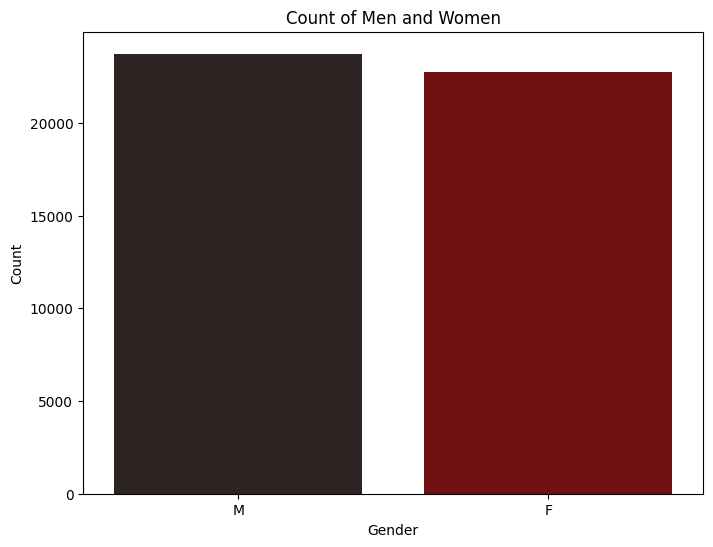

In [38]:
# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, hue=gender_counts.index, palette='dark:maroon')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Men and Women')

plt.show()

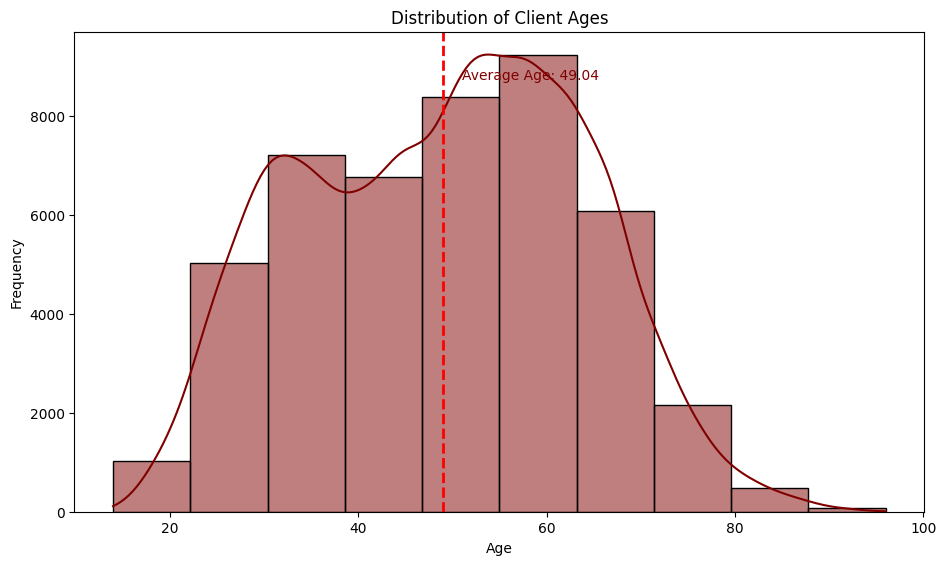

In [39]:
# Create a histogram of ages
plt.figure(figsize=(10, 6))
sns.histplot(df_profile['clnt_age'], bins=10, kde=True, color='maroon')
plt.axvline(average_age, color='red', linestyle='dashed', linewidth=2)
plt.text(average_age + 2, plt.ylim()[1] * 0.9, f'Average Age: {average_age:.2f}', color='maroon')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Client Ages')
plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.1)  # Adjust padding
plt.savefig("../image/vis2.png")

plt.show()

# KPI´s and Metrics

## Completion Rate: This KPI measures the proportion of users who successfully complete the entire process, from the initial page to the confirmation page. A higher completion rate indicates that the new design is more effective. 

Time Spent on Each Step: Understanding the average duration users spend on each step provides insights into user engagement and potential bottlenecks. A decrease in the time spent on each step with the new design suggests improved efficiency and user experience.

Error Rates: Errors such as users going back to a previous step or encountering validation issues indicate confusion or difficulty in progressing through the process. A lower error rate with the new design suggests clearer navigation and reduced user frustration.

# Hypothesis Testing

## completion rate between the Test and Control groups

In [74]:
# Merge df_roster and df_footprint on 'client_id'
merged_df = pd.merge(df_footprint, df_roster, on='client_id')

# Filter rows where process_step is 'confirm'
confirm_df = merged_df[merged_df['process_step'] == 'confirm']

# Calculate total clients in Test and Control groups
total_clients_test = df_roster[df_roster['Variation'] == 'Test']['client_id'].nunique()
total_clients_control = df_roster[df_roster['Variation'] == 'Control']['client_id'].nunique()

# Calculate the number of clients who completed the 'confirm' step in each group
completed_test = confirm_df[confirm_df['Variation'] == 'Test']['client_id'].nunique()
completed_control = confirm_df[confirm_df['Variation'] == 'Control']['client_id'].nunique()

# Calculate completion rates
completion_rate_test = completed_test / total_clients_test
completion_rate_control = completed_control / total_clients_control

# Display results
print(f"Completion rate (Test): {completion_rate_test:.2f}")
print(f"Completion rate (Control): {completion_rate_control:.2f}")

Completion rate (Test): 0.69
Completion rate (Control): 0.66


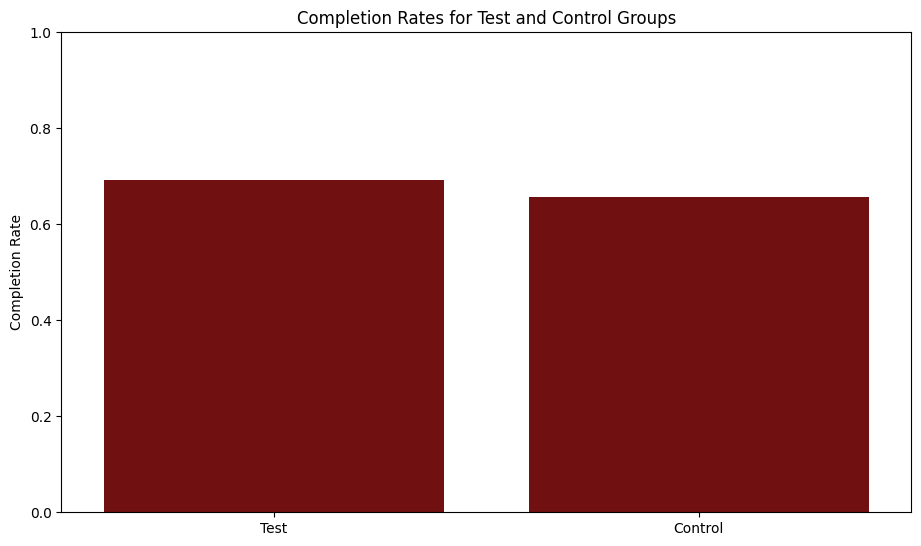

In [73]:
# Create a bar plot for completion rates
plt.figure(figsize=(10, 6))
sns.barplot(x=['Test', 'Control'], y=[completion_rate_test, completion_rate_control], color='maroon')
plt.ylabel('Completion Rate')
plt.title('Completion Rates for Test and Control Groups')
plt.ylim(0, 1)
plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.1)  # Adjust padding
plt.savefig("../image/vis3.png")

plt.show()

## Completion Rate with a Cost-Effectiveness Threshold

In [45]:
# Calculate completion rates for Test and Control groups
completion_rate_test = completed_test / total_clients_test
completion_rate_control = completed_control / total_clients_control

# Calculate the difference in completion rates
completion_rate_difference = completion_rate_test - completion_rate_control

# Calculate the percentage increase in completion rate
percentage_increase = completion_rate_difference / completion_rate_control * 100

# Check if the percentage increase meets or exceeds the 5% threshold
if percentage_increase >= 5:
    print(f"The observed increase in completion rate meets or exceeds the 5% threshold. The new design is deemed cost-effective.")
else:
    print(f"The observed increase in completion rate does not meet the 5% threshold. The new design may not be deemed cost-effective.")

# Display the calculated completion rates, difference, and percentage increase
print(f"Completion Rate (Test Group): {completion_rate_test:.2%}")
print(f"Completion Rate (Control Group): {completion_rate_control:.2%}")
print(f"Difference in Completion Rates: {completion_rate_difference:.2%}")
print(f"Percentage Increase in Completion Rate: {percentage_increase:.2f}%")



The observed increase in completion rate meets or exceeds the 5% threshold. The new design is deemed cost-effective.
Completion Rate (Test Group): 69.29%
Completion Rate (Control Group): 65.59%
Difference in Completion Rates: 3.71%
Percentage Increase in Completion Rate: 5.65%


In [48]:
""" given that The average age of the clients is 49.04 years old.
The primary clients are older, data showed that The completion rate for clients aged 50-60 and gender F is 0.84
The completion rate for clients aged 50-60 and gender M is 0.86, therefore UX/UI should focus on designing towards that demographic
"""
# Filter clients between 50 and 60 years old
df_profile_filtered = df_profile[(df_profile['clnt_age'] >= 50) & (df_profile['clnt_age'] <= 60)]

# Group by gender
grouped = df_profile_filtered.groupby('gendr')

# Initialize empty dictionary to store completion rates
completion_rates = {}

# Calculate completion rate for each gender group
for name, group in grouped:
    total_clients = group['client_id'].nunique()
    
    completed = df_footprint[(df_footprint['process_step'] == 'confirm') & 
                             (df_footprint['client_id'].isin(group['client_id']))]
    
    completion_rate = len(completed) / total_clients
    completion_rates[name] = completion_rate

# Print completion rates
for gender, rate in completion_rates.items():
    print(f"The completion rate for clients aged 50-60 and gender {gender} is {rate:.2f}")

The completion rate for clients aged 50-60 and gender F is 0.84
The completion rate for clients aged 50-60 and gender M is 0.87


In [51]:

# Calculate statistics for the entire client age
variance_age = df_profile['clnt_age'].var()
std_dev_age = df_profile['clnt_age'].std()
min_age = df_profile['clnt_age'].min()
max_age = df_profile['clnt_age'].max()
range_age = max_age - min_age
quantiles_age = df_profile['clnt_age'].quantile([0.25, 0.5, 0.75])

# Print the calculated statistics
print(f"Variance of age: {variance_age}")
print(f"Standard deviation of age: {std_dev_age}")
print(f"Minimum age: {min_age}")
print(f"Maximum age: {max_age}")
print(f"Range of age: {range_age}")
print(f"Quantiles of age: {quantiles_age}")

# Step 1: Filter clients between 50 and 60 years old
df_profile_filtered = df_profile[(df_profile['clnt_age'] >= 50) & (df_profile['clnt_age'] <= 60)]

# Step 2: Group by gender
grouped = df_profile_filtered.groupby('gendr')

# Step 3: Initialize empty dictionary to store completion rates and mean ages
completion_data = {}

# Step 4: Calculate completion rate and mean age for each gender group
for name, group in grouped:
    total_clients = group['client_id'].nunique()
    
    completed = df_footprint[(df_footprint['process_step'] == 'confirm') & 
                             (df_footprint['client_id'].isin(group['client_id']))]
    
    completion_rate = len(completed) / total_clients
    mean_age = group['clnt_age'].mean()
    
    completion_data[name] = {
        'completion_rate': completion_rate,
        'mean_age': mean_age
    }

# Step 5: Find the highest completion rate
highest_completion_rate_gender = max(completion_data, key=lambda x: completion_data[x]['completion_rate'])
highest_completion_rate = completion_data[highest_completion_rate_gender]['completion_rate']
highest_completion_mean_age = completion_data[highest_completion_rate_gender]['mean_age']

# Step 6: Sort the completion data by gender
sorted_completion_data = dict(sorted(completion_data.items()))

# Step 7: Print the sorted completion rates and mean ages by gender
for gender, data in sorted_completion_data.items():
    print(f"Gender: {gender}, Completion Rate: {data['completion_rate']: .2f}, Mean Age: {data['mean_age']:.2f}")

# Step 8: Print the highest completion rate and mean age
print(f"\nThe highest completion rate is {highest_completion_rate: .2f} for gender {highest_completion_rate_gender}")
print(f"The mean age of clients with the highest completion rate ({highest_completion_rate_gender}) is {highest_completion_mean_age:.2f}")

Variance of age: 222.02485419757957
Standard deviation of age: 14.90049845466854
Minimum age: 14.0
Maximum age: 96.0
Range of age: 82.0
Quantiles of age: 0.25    36.5
0.50    50.0
0.75    60.5
Name: clnt_age, dtype: float64
Gender: F, Completion Rate:  0.84, Mean Age: 55.04
Gender: M, Completion Rate:  0.87, Mean Age: 54.98

The highest completion rate is  0.87 for gender M
The mean age of clients with the highest completion rate (M) is 54.98


## Other Hypothesis

## test whether the average age of clients engaging with the new process is the same as those engaging with the old process

In [53]:
from scipy.stats import ttest_ind

# Define Test and Control groups based on clients engaging with the new and old processes
test_group = df_profile[df_profile['client_id'].isin(df_roster[df_roster['Variation'] == 'Test']['client_id'])]['clnt_age']
control_group = df_profile[df_profile['client_id'].isin(df_roster[df_roster['Variation'] == 'Control']['client_id'])]['clnt_age']

# Check for and remove any NaN values in age groups (if any)
test_group = test_group.dropna()
control_group = control_group.dropna()

# Ensure both groups are not empty and contain numerical data
if test_group.empty or control_group.empty:
    print("One of the groups is empty. Cannot perform t-test.")
else:
    # Perform two-sample t-test
    t_statistic, p_value = ttest_ind(test_group, control_group, equal_var=False)

    # Set significance level
    alpha = 0.05

    # Compare p-value to alpha
    if p_value < alpha:
        print(f"Reject the null hypothesis. There is a statistically significant difference in the average age between clients engaging with the new and old processes. p-value: {p_value:.2f}")
    else:
        print(f"Fail to reject the null hypothesis. The average age of clients engaging with the new process is not significantly different from those engaging with the old process. p-value: {p_value:.2f}")

Reject the null hypothesis. There is a statistically significant difference in the average age between clients engaging with the new and old processes. p-value: 0.02


In [61]:
[5]*3

[5, 5, 5]

In [66]:
test_control_df = pd.DataFrame({"Test": list(test_group.values), 
              "Control": list(control_group)+[np.nan]*( len(list(test_group.values)) - len(list(control_group)) ) })

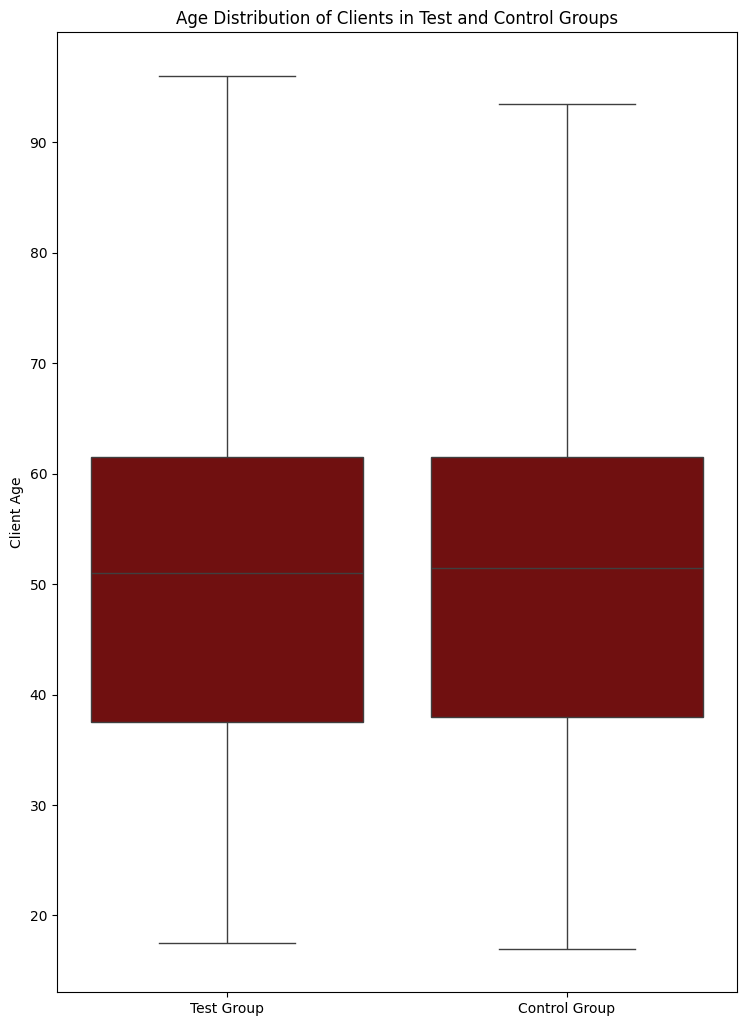

In [75]:
# Create a boxplot for the ages in Test and Control groups
plt.figure(figsize=(8, 12))
sns.boxplot(data=test_control_df, color='maroon')
plt.xticks([0, 1], ['Test Group', 'Control Group'])
plt.ylabel('Client Age')
plt.title('Age Distribution of Clients in Test and Control Groups')
plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.1)  # Adjust padding
plt.savefig("../image/vis4.png")

plt.show()

## test if the average client tenure (how long they’ve been with Vanguard) of those engaging with the new process is the same as those engaging with the old process

In [78]:
# Merge df_profile with df_roster to get the Variation information
df_merged = df_profile.merge(df_roster, on='client_id', how='left')

# Exclude NaN values
df_merged = df_merged.dropna(subset=['clnt_tenure_yr'])

# Separate the tenures into Test and Control groups
test_group_tenure = df_merged[df_merged['Variation'] == 'Test']['clnt_tenure_yr']
control_group_tenure = df_merged[df_merged['Variation'] == 'Control']['clnt_tenure_yr']

# Perform an independent t-test
t_stat, p_value = ttest_ind(test_group_tenure, control_group_tenure)

# Display the results
print(f"T-statistic: {t_stat: .2f}, P-value: {p_value: .2f}") 

if p_value < 0.05:
    print("There is a significant difference in average client tenure between Test and Control groups.")
else:
    print("There is no significant difference in average client tenure between Test and Control groups.")

T-statistic: -1.52, P-value:  0.13
There is no significant difference in average client tenure between Test and Control groups.


In [80]:
# Merge df_profile with df_roster to get the Variation information
df_merged = df_profile.merge(df_roster, on='client_id', how='left')

# Exclude NaN values
df_merged = df_merged.dropna(subset=['clnt_tenure_yr'])

# Separate the tenures into Test and Control groups
test_group_tenure = df_merged[df_merged['Variation'] == 'Test']['clnt_tenure_yr']
control_group_tenure = df_merged[df_merged['Variation'] == 'Control']['clnt_tenure_yr']

# Calculate average client tenure for Test and Control groups
average_tenure_test = test_group_tenure.mean()
average_tenure_control = control_group_tenure.mean()

# Perform an independent t-test
t_stat, p_value = ttest_ind(test_group_tenure, control_group_tenure)

# Display the results
print(f"Average client tenure for Test group: {average_tenure_test: .2f}")
print(f"Average client tenure for Control group: {average_tenure_control: .2f}")
print(f"T-statistic: {t_stat: .2f}, P-value: {p_value: .2f}")

if p_value < 0.05:
    print("There is a significant difference in average client tenure between Test and Control groups.")
else:
    print("There is no significant difference in average client tenure between Test and Control groups.")

Average client tenure for Test group:  14.77
Average client tenure for Control group:  14.87
T-statistic: -1.52, P-value:  0.13
There is no significant difference in average client tenure between Test and Control groups.


In [71]:
df_profile.to_csv("../data/profile.csv", index=False, encoding='utf-8')
df_roster.to_csv("../data/roster.csv", index=False, encoding='utf-8')
df_footprint.to_csv("../data/footprint.csv", index=False, encoding='utf-8')